# Machine Learning for Earth and Environmental Sciences

### Michaïl Gerard Henry's Project

The following project was create using 

![image](https://raw.githubusercontent.com/seisbench/seisbench/main/docs/_static/seisbench_logo_subtitle_outlined.svg)

### [Github](https://github.com/miichenry/machinelearning_UNIL.git)

## 1. Install and import prerequisites

In [22]:
#%pip install seisbench
#%pip install scikit-learn

In [24]:
import seisbench
import seisbench.data as sbd

In [25]:
import sklearn
!python -m pip show scikit-learn  #to see which version and where scikit-learn is installed
#!python -c "import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/users/h/henrymi2/.local/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
#!python -m pip freeze  #to see all packages installed in the active virtualenv

## 2. Loading Data

We will load a benchmark dataset from seisbench called LenDB 
https://zenodo.org/records/3648232

In [28]:
data = sbd.LenDB()
print(data)

LenDB - 1244942 traces


In [29]:
import os
print("Cache root:", seisbench.cache_root)
print("Contents:", os.listdir(seisbench.cache_root))
print("datasets:", os.listdir(seisbench.cache_root / "datasets"))
print("lenDB:", os.listdir(seisbench.cache_root / "datasets" / "lendb"))

Cache root: /home/users/h/henrymi2/.seisbench
Contents: ['config.json', 'models', 'datasets']
datasets: ['geofon', 'lendb', 'isc_ehb_depthphases', 'instancecounts', 'instancegm', 'ethz']
lenDB: ['metadata.csv', 'waveforms.hdf5']


In [31]:
print('Citation:', data.citation)
print('License:', data.license)

Citation: Magrini, Fabrizio, Jozinović, Dario, Cammarano, Fabio, Michelini, Alberto, & Boschi, Lapo. (2020). LEN-DB - Local earthquakes detection: a benchmark dataset of 3-component seismograms built on a global scale [Data set]. Zenodo. https://doi.org/10.5281/zenodo.3648232
License: CC BY 4.0


# 2. Data visualisation

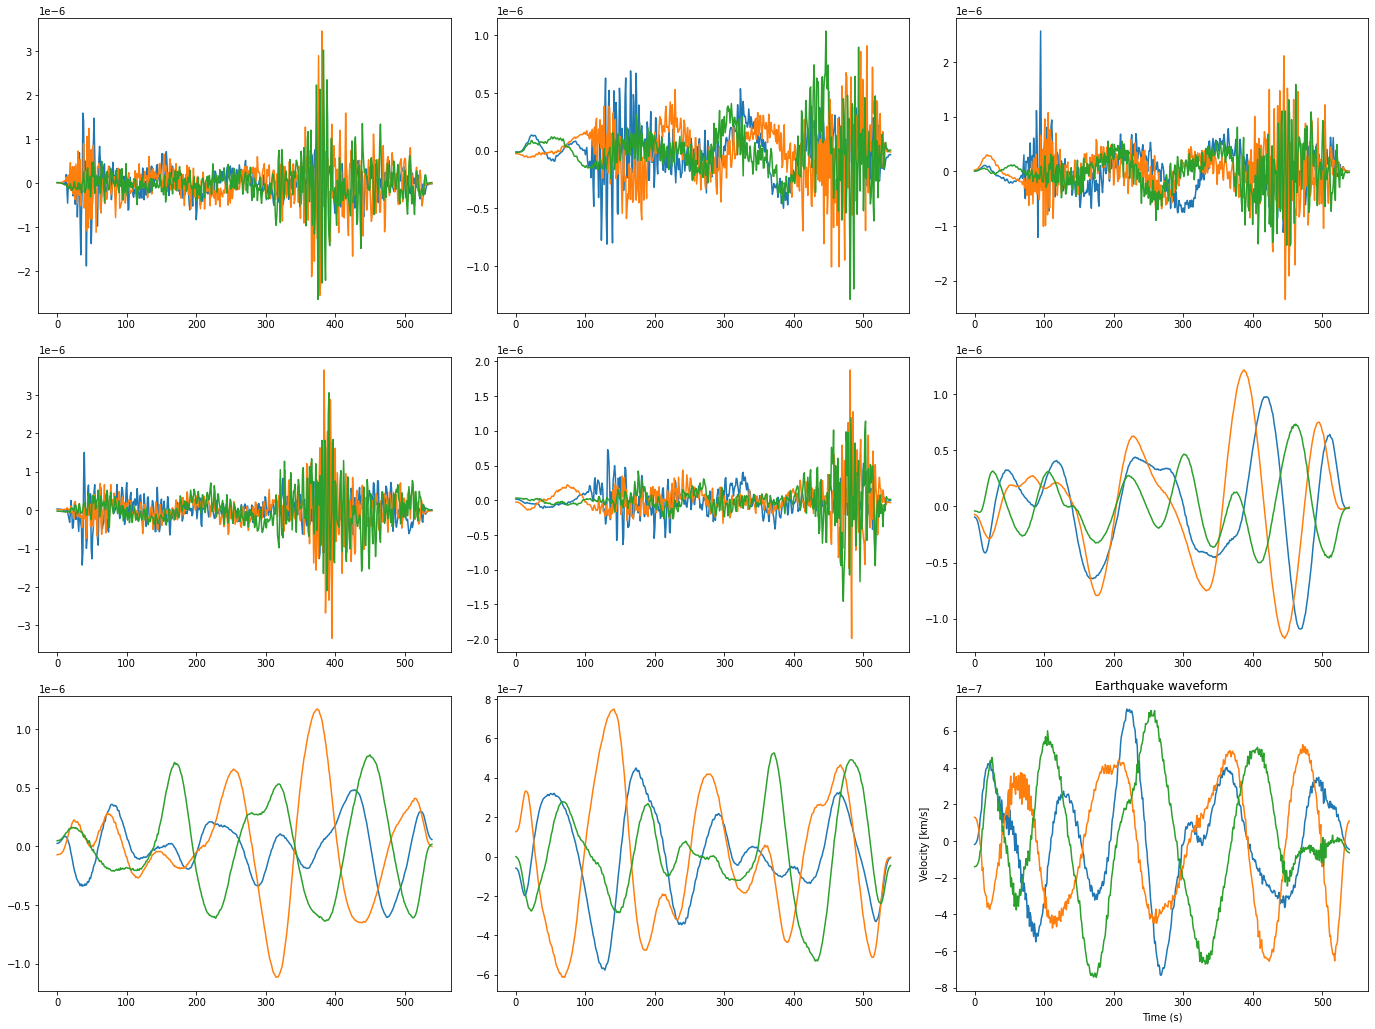

In [108]:
index = [1,2,3,4,5,1244937,1244936,1244935,1244934]
counter=0
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(3*6.4,3*4.8))
for i in range(3):
    for j in range(3):
        waveforms = data.get_waveforms(index[counter])
        axes[i, j].plot(waveforms.T)
        counter += 1
plt.title('Earthquake waveform')
plt.xlabel('Time (s)')
plt.ylabel('Velocity [km/s]')
fig.tight_layout()
plt.show()

In [32]:
#pd.set_option("display.max.columns", None)
#pd.set_option("min_rows", 100)

In [33]:
data.metadata

,index,trace_name,trace_start_time,trace_category,trace_p_arrival_sample,trace_p_status,station_code,station_network_code,station_latitude_deg,station_longitude_deg,...,source_depth_km,source_origin_time,path_ep_distance_km,path_azimuth_deg,path_back_azimuth_deg,split,trace_name_original,trace_chunk,trace_sampling_rate_hz,trace_component_order
0,0,"bucket0$0,:3,:540",2012-11-29T18:21:44.099900Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2012-11-29T18:21:27.400000Z,125.778865,17.614884,197.819975,train,AE_319A_1354213304.0999,,20,ZNE
1,1,"bucket0$1,:3,:540",2012-12-11T18:57:34.425000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2012-12-11T18:57:19.300000Z,114.350587,17.033169,197.213904,train,AE_319A_1355252254.425,,20,ZNE
2,2,"bucket0$2,:3,:540",2013-02-07T19:02:29.550000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,3.0,2013-02-07T19:02:14.600000Z,109.835594,14.296218,194.442617,train,AE_319A_1360263749.5500002,,20,ZNE
3,3,"bucket0$3,:3,:540",2013-03-06T19:11:47.200000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,5.0,2013-03-06T19:11:31.100000Z,116.405786,13.714567,193.863404,train,AE_319A_1362597107.2,,20,ZNE
4,4,"bucket0$4,:3,:540",2013-03-18T18:54:21.650000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2013-03-18T18:54:06.900000Z,111.888527,12.327348,192.456239,train,AE_319A_1363632861.6499999,,20,ZNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244937,1244937,"bucket1217$370,:3,:540",2018-12-17T08:36:06.760000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545035766.76,,20,ZNE
1244938,1244938,"bucket1217$371,:3,:540",2018-12-24T11:53:27.600000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545652407.6,,20,ZNE
1244939,1244939,"bucket1217$372,:3,:540",2018-12-26T19:45:56.750000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545853556.7500002,,20,ZNE
1244940,1244940,"bucket1217$373,:3,:540",2018-12-28T05:44:33.380000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545975873.38,,20,ZNE


waveforms.shape: (3, 540)


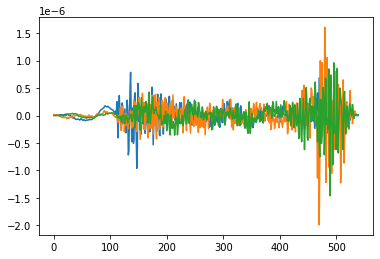

In [35]:
waveforms = data.get_waveforms(6)
print("waveforms.shape:", waveforms.shape)
plt.plot(waveforms.T);

## 3. Preprocessing

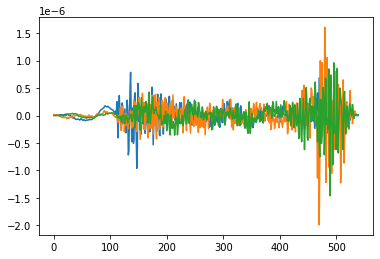

In [36]:
plt.plot(waveforms.T);

In [37]:
type(waveforms)

numpy.ndarray

### 3.1 Discard horizontal channels 

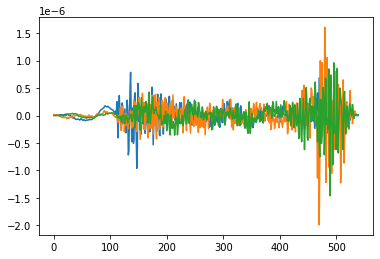

In [38]:
plt.plot(waveforms.T);

In [39]:
#print(waveforms.shape) # It is numpy.ndarray with 3 dimensions, each one is a different channel
print(f"\n waveforms contains {waveforms.shape[0]} dimensions \n")
vertical_waveform = waveforms[0] #take only the first dimension (vertical component)
print(f"\n vertical_waveform contains 1 dimensions \n")


 waveforms contains 3 dimensions 


 vertical_waveform contains 1 dimensions 



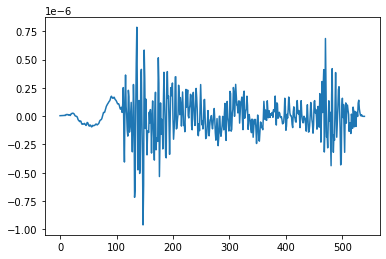

In [40]:
plt.plot(vertical_waveform.T);

## 4. Extracting waveform of Earthquake and Noise 

In [41]:
rows_earthquake = data.metadata[data.metadata["trace_category"] == "earthquake"]
print(rows_earthquake.index)
print(len(rows_earthquake.index)) # I am selecting from the dataframe only the data where trace_category is == earthquake 

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       629085, 629086, 629087, 629088, 629089, 629090, 629091, 629092, 629093,
       629094],
      dtype='int64', length=629095)
629095


In [42]:
rows_earthquake

,index,trace_name,trace_start_time,trace_category,trace_p_arrival_sample,trace_p_status,station_code,station_network_code,station_latitude_deg,station_longitude_deg,...,source_depth_km,source_origin_time,path_ep_distance_km,path_azimuth_deg,path_back_azimuth_deg,split,trace_name_original,trace_chunk,trace_sampling_rate_hz,trace_component_order
0,0,"bucket0$0,:3,:540",2012-11-29T18:21:44.099900Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2012-11-29T18:21:27.400000Z,125.778865,17.614884,197.819975,train,AE_319A_1354213304.0999,,20,ZNE
1,1,"bucket0$1,:3,:540",2012-12-11T18:57:34.425000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2012-12-11T18:57:19.300000Z,114.350587,17.033169,197.213904,train,AE_319A_1355252254.425,,20,ZNE
2,2,"bucket0$2,:3,:540",2013-02-07T19:02:29.550000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,3.0,2013-02-07T19:02:14.600000Z,109.835594,14.296218,194.442617,train,AE_319A_1360263749.5500002,,20,ZNE
3,3,"bucket0$3,:3,:540",2013-03-06T19:11:47.200000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,5.0,2013-03-06T19:11:31.100000Z,116.405786,13.714567,193.863404,train,AE_319A_1362597107.2,,20,ZNE
4,4,"bucket0$4,:3,:540",2013-03-18T18:54:21.650000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2013-03-18T18:54:06.900000Z,111.888527,12.327348,192.456239,train,AE_319A_1363632861.6499999,,20,ZNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629090,629090,"bucket616$226,:3,:540",2018-12-24T11:12:05.800000Z,earthquake,80.0,estimated,FTGH,XV,64.691704,-148.827896,...,12.2,2018-12-24T11:11:57.886000Z,68.078777,129.795721,310.788333,test,XV_FTGH_1545649925.8,,20,ZNE
629091,629091,"bucket616$227,:3,:540",2018-12-26T01:06:58.810000Z,earthquake,80.0,estimated,FTGH,XV,64.691704,-148.827896,...,16.3,2018-12-26T01:06:58.819000Z,16.453767,62.555424,242.831981,test,XV_FTGH_1545786418.81,,20,ZNE
629092,629092,"bucket616$228,:3,:540",2018-12-26T14:27:32.420000Z,earthquake,80.0,estimated,FTGH,XV,64.691704,-148.827896,...,9.8,2018-12-26T14:27:23.503000Z,74.312080,50.743058,231.831352,test,XV_FTGH_1545834452.42,,20,ZNE
629093,629093,"bucket616$229,:3,:540",2018-12-27T01:16:06.760000Z,earthquake,80.0,estimated,FTGH,XV,64.691704,-148.827896,...,0.0,2018-12-27T01:15:57.382000Z,77.583768,250.441596,69.055068,test,XV_FTGH_1545873366.76,,20,ZNE


In [43]:
rows_noise = data.metadata[data.metadata["trace_category"] == "noise"]
print(rows_noise.index)
print(len(rows_noise.index))

Index([ 629095,  629096,  629097,  629098,  629099,  629100,  629101,  629102,
        629103,  629104,
       ...
       1244932, 1244933, 1244934, 1244935, 1244936, 1244937, 1244938, 1244939,
       1244940, 1244941],
      dtype='int64', length=615847)
615847


In [44]:
rows_noise

,index,trace_name,trace_start_time,trace_category,trace_p_arrival_sample,trace_p_status,station_code,station_network_code,station_latitude_deg,station_longitude_deg,...,source_depth_km,source_origin_time,path_ep_distance_km,path_azimuth_deg,path_back_azimuth_deg,split,trace_name_original,trace_chunk,trace_sampling_rate_hz,trace_component_order
629095,629095,"bucket614$170,:3,:540",2012-04-20T02:05:12.525000Z,noise,NaN,NaN,113A,AE,32.768299,-113.766701,...,NaN,NaN,NaN,NaN,NaN,train,AE_113A_1334887512.5249999,,20,ZNE
629096,629096,"bucket614$171,:3,:540",2012-05-10T08:52:28.775000Z,noise,NaN,NaN,113A,AE,32.768299,-113.766701,...,NaN,NaN,NaN,NaN,NaN,train,AE_113A_1336639948.775,,20,ZNE
629097,629097,"bucket614$172,:3,:540",2012-05-17T12:34:17.274900Z,noise,NaN,NaN,113A,AE,32.768299,-113.766701,...,NaN,NaN,NaN,NaN,NaN,train,AE_113A_1337258057.2749,,20,ZNE
629098,629098,"bucket614$173,:3,:540",2012-05-23T08:59:58.200000Z,noise,NaN,NaN,113A,AE,32.768299,-113.766701,...,NaN,NaN,NaN,NaN,NaN,train,AE_113A_1337763598.2,,20,ZNE
629099,629099,"bucket614$174,:3,:540",2012-06-02T20:45:57.350000Z,noise,NaN,NaN,113A,AE,32.768299,-113.766701,...,NaN,NaN,NaN,NaN,NaN,train,AE_113A_1338669957.3500001,,20,ZNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244937,1244937,"bucket1217$370,:3,:540",2018-12-17T08:36:06.760000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545035766.76,,20,ZNE
1244938,1244938,"bucket1217$371,:3,:540",2018-12-24T11:53:27.600000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545652407.6,,20,ZNE
1244939,1244939,"bucket1217$372,:3,:540",2018-12-26T19:45:56.750000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545853556.7500002,,20,ZNE
1244940,1244940,"bucket1217$373,:3,:540",2018-12-28T05:44:33.380000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545975873.38,,20,ZNE


In [45]:
size = 5000
rnd_earthquake = np.random.choice(rows_earthquake.index, size, replace=False)
#print(rnd_earthquake)

In [46]:
rnd_noise = np.random.choice(rows_earthquake.index, size, replace=False)
#print(rnd_noise)

## 4. Matrix Input

### Iterate the process accesing the waveform, and start with a matrix N = 10^4

In [47]:
dataset_e = data.get_waveforms(rnd_earthquake)[:,0,:]
print("dataset.shape:", dataset_e.shape)
label_e = np.ones(size)
#print(label_e)

dataset.shape: (5000, 540)


In [48]:
dataset_n = data.get_waveforms(rnd_noise)[:,0,:]
print("dataset.shape:", dataset_n.shape)
label_n = np.zeros(size)
#print(label_e)

dataset.shape: (5000, 540)


In [49]:
mtx = np.concatenate((dataset_e, dataset_n), axis=0)
Y = np.concatenate((label_e, label_n), axis=0)
# shuffling
random_indexes = np.arange(Y.shape[0])
np.random.shuffle(random_indexes)
mtx = mtx[random_indexes]
Y = Y[random_indexes]

print("data.shape:", mtx.shape)
print("label.shape:", Y.shape)


data.shape: (10000, 540)
label.shape: (10000,)


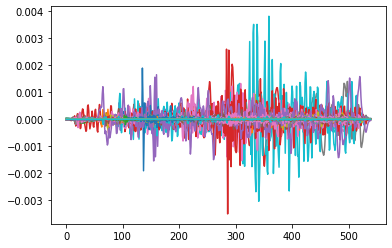

In [50]:
plt.figure()
for row in mtx:
    plt.plot(row);

In [51]:
#for row in mtx:
#    plt.figure()
#    plt.plot(row);

## 3.2 Features engineering

### Reduce dimentionaly by filtering

### FFT

In [52]:
#Create a matrix with the X rows fft though the X matrix,
fft_mtx = np.fft.fft(mtx, axis = 1)
fft_mtx.shape

(10000, 540)

In [53]:
X = np.log(np.abs(fft_mtx+1e-64)) #removing the imaginary part
X.shape == fft_mtx.shape
print(X)

[[-12.74084458 -12.80210236 -11.99706815 ... -10.49847793 -11.99706815
  -12.80210236]
 [-12.51174733 -12.37587479 -10.95432249 ...  -9.69518567 -10.95432249
  -12.37587479]
 [-13.00764212 -12.92999298 -11.97053498 ... -10.83684265 -11.97053498
  -12.92999298]
 ...
 [-14.06752514 -13.92772306 -12.53881862 ... -10.73526505 -12.53881862
  -13.92772306]
 [-14.75461375 -13.88602509 -12.96865598 ... -12.31269599 -12.96865598
  -13.88602509]
 [-14.30827146 -14.00578207 -13.10606186 ... -12.31235202 -13.10606186
  -14.00578207]]


In [54]:
X.sha

AttributeError: 'numpy.ndarray' object has no attribute 'sha'

In [34]:
#Xnorm = (X - X.mean(axis =1).reshape(-1,1)) / (X.std(axis=1).reshape((-1,1)) + 1e-6)

In [92]:
mtx.shape == fft_mtx.shape

True

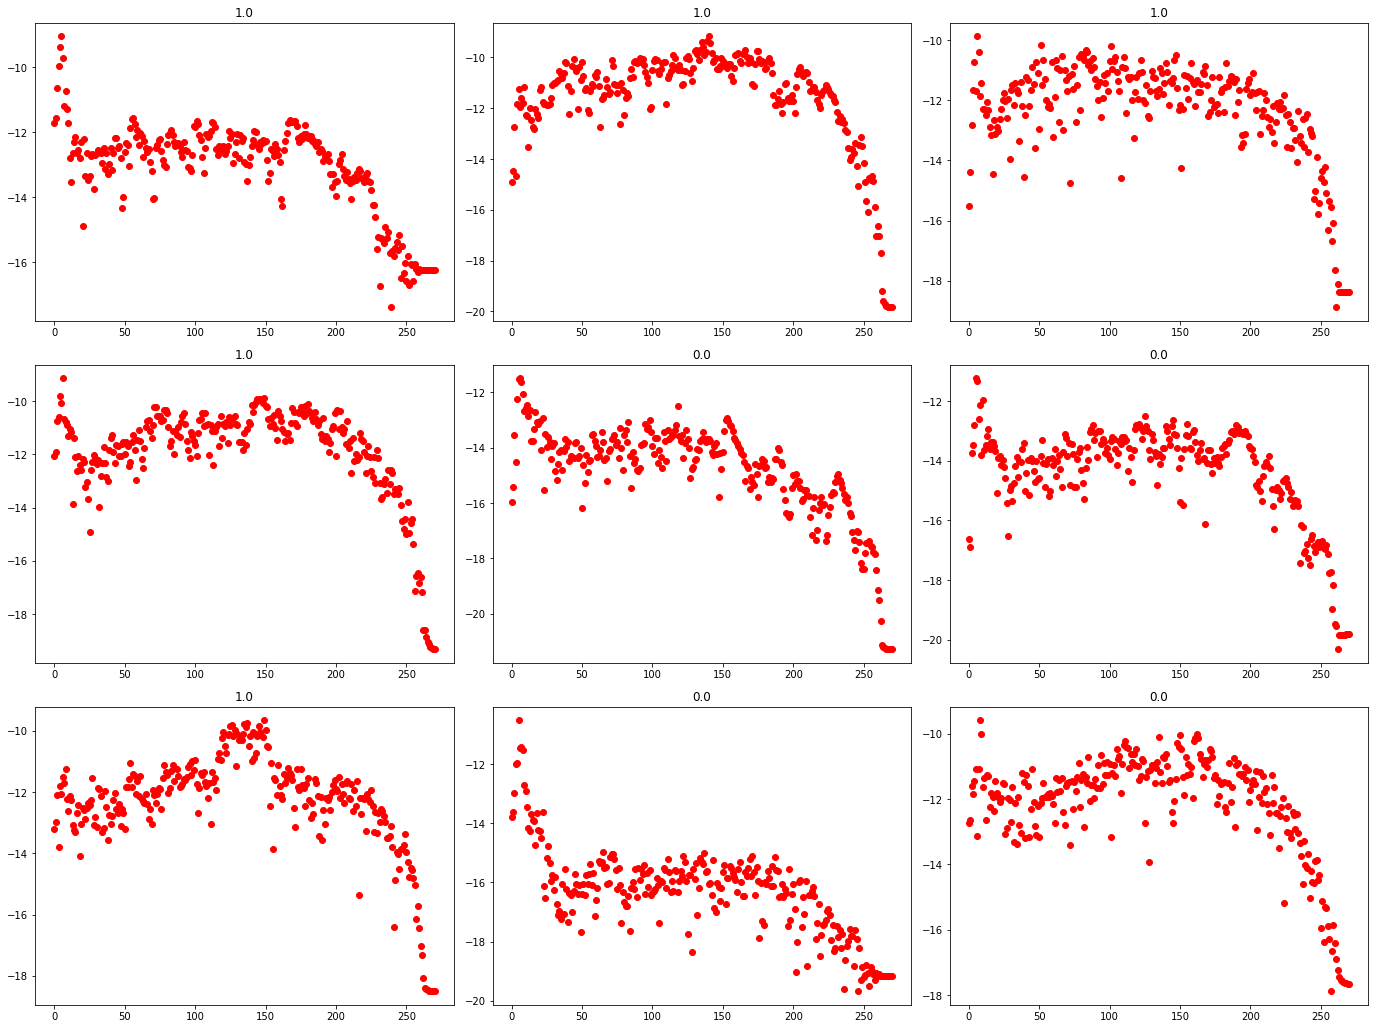

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(3*6.4,3*4.8))
counter = 100
for i in range(3):
    for j in range(3):
        axes[i, j].set_title(Y[counter])
        #freq = np.fft.fftfreq(Xnorm[counter].shape[-1]) # same as len(vertical_waveform) or vertical_waveform.size
        #axes[i, j].plot(Xnorm[counter, :542//2], "ro")
        axes[i, j].plot(X[counter, :542//2], "ro")
        counter += 1
fig.tight_layout()
plt.savefig("Figures/mtx_std_log.pdf")
plt.show()


## 5. Random Forest model

### 5.1 Divide dataset for training, testing

In [41]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(Xnorm , Y, test_size=0.2)
#train, dev, test = fft_mtx.train_dev_test()
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.2)
#train, dev, test = fft_mtx.train_dev_test()

print("Train:", X_train.shape)
print("Label Train:", y_train.shape)
#print("Dev:", dev)
print("Test:", X_test.shape)
print("Label Test:", y_test.shape)

Train: (8000, 540)
Label Train: (8000,)
Test: (2000, 540)
Label Test: (2000,)


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier### 5.2 GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Conduct the grid search to find good hyperparameter values
# for your decision tree
# For 'max_leaf_nodes', search between 2 and 120
# For 'min_samples_split', search between 2 and 10

##############################################################################################################################
# 1. Define hyperparameter search grid
##############################################################################################################################
# In param_grid, define the hyperparameters you would like to test, and the ranges the hyperparameters should be in
param_grid ={'min_samples_split':range(2,10), 'max_leaf_nodes':range(2,120)}

##############################################################################################################################
# 2. GridSearch
##############################################################################################################################
# Perform GridSearch on your DecisionTree (random_state=42 to ensure same result every time)
# use cv=3, verbose=1 for GridSearchCV()
gsc_tree = GridSearchCV(DecisionTreeClassifier(random_state = 42),param_grid,cv = 3, verbose =1)

##############################################################################################################################
# 3. Fit on training set
##############################################################################################################################
gsc_tree.fit(X_train,y_train)

In [ ]:
# Print the best values you found for the hyperparameters
# using the `best_estimator_` attribute of your grid search object
gsc_tree.best_estimator_

### 5.2 Linear Test Fitting

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
y_train.mean()
y_test.mean()

0.5015

In [44]:
lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train[:, :542//2], y_train)

/home/users/h/henrymi2/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [45]:
y_pred_lr = lr_clf.predict(X_test[:, :542//2])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.4885

### 5.2 Randome Forest Fitting

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train[:, :542//2], y_train)

RandomForestClassifier()

In [49]:
y_pred_rf = rnd_clf.predict(X_test[:, :542//2])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf)

0.509

## Classification report

In [119]:
from sklearn.metrics import classification_report

In [122]:
target_names = ['Earthquake', 'Noise']
print(classification_report(y_test, y_pred_rf, target_names=target_names))


              precision    recall  f1-score   support

  Earthquake       0.52      0.51      0.52      1023
       Noise       0.50      0.50      0.50       977

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



## Code Appendix

In [ ]:
# Scatter points for which your best model made erroneous predictions
# and compare them to points for which your best models made correct predictions
y_pred = gsc_tree.predict(X_test)
corr_X,wrong_X = [],[]
for indx,obj in enumerate(y_pred): # Pull out predictions on each data points one-by-one
  if obj != y_test[indx]: # If the predictions is not equal to output truth (y_test)
    wrong_X.append(X_test[indx]) # Model made an error
  else:
    corr_X.append(X_test[indx]) # Model correct prediction

In [49]:
# Calculate the mean accuracy

In [50]:
# Visualize the distribution of accuracies

n other

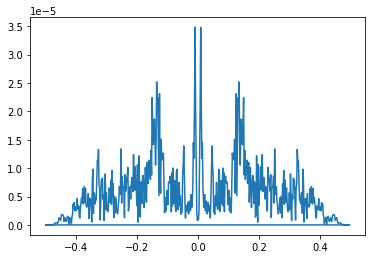

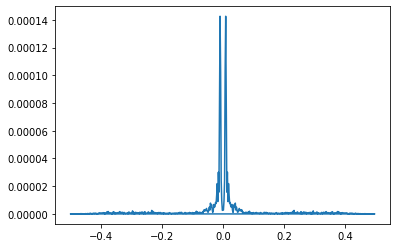

In [47]:
waveforms = data.get_waveforms(1)
vertical_waveform = waveforms[0]
#print(vertical_waveform.shape)
sp = np.fft.fft(vertical_waveform)
freq = np.fft.fftfreq(vertical_waveform.shape[-1]) # same as len(vertical_waveform) or vertical_waveform.size
#print(freq)
plt.figure()
plt.plot(freq, np.abs(sp), "-")

waveforms1 = data.get_waveforms(1244941)
vertical_waveform1 = waveforms1[0]
#print(vertical_waveform.shape)
sp1 = np.fft.fft(vertical_waveform1)
freq1 = np.fft.fftfreq(vertical_waveform1.shape[-1]) # same as len(vertical_waveform) or vertical_waveform.size
#print(freq)
plt.figure()
plt.plot(freq1, np.abs(sp1), "-")
plt.show()


## Presentation Plots

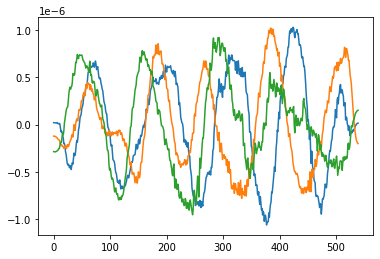

In [38]:
wf1 = data.get_waveforms(3)
wf2 = data.get_waveforms(1244941)

v_wf1 = wf1[0]
v_wf2 = wf2[0]


fft_wv1 = np.fft.fft(v_wf1)
fft_wv2 = np.fft.fft(v_wf2)
freq1 = np.fft.fftfreq(fft_wv1.shape[-1])
freq2 = np.fft.fftfreq(fft_wv2.shape[-1])

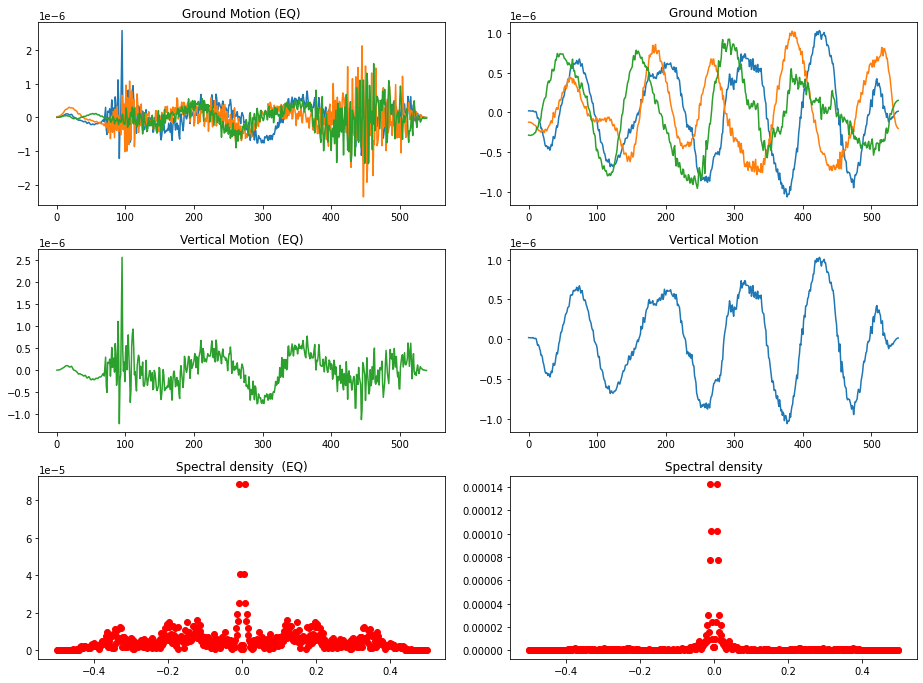

In [65]:
#plt.savefig("sine_wave.png")
#plt.savefig("sine_wave.jpg")

fig, axs = plt.subplots(3, 2, figsize=(2*6.4,2*4.8))
axs[0, 0].plot(wf1.T)
axs[0, 0].set_title('Ground Motion (EQ)')

axs[0, 1].plot(wf2.T)
axs[0, 1].set_title('Ground Motion')


axs[1, 0].plot(v_wf1.T, 'tab:green')
axs[1, 0].set_title('Vertical Motion  (EQ)')


axs[1, 1].plot(v_wf2.T, 'tab:blue')
axs[1, 1].set_title('Vertical Motion')


axs[2, 0].plot(freq1, np.abs(fft_wv1), 'ro')
axs[2, 0].set_title('Spectral density  (EQ)')


axs[2, 1].plot(freq2, np.abs(fft_wv2), 'ro')
axs[2, 1].set_title('Spectral density')

    
fig.tight_layout()

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
    #ax.label_outer()

plt.savefig("Figures/preprocessing.pdf")